In [1]:
!pip install nasdaq-data-link

In [2]:
import nasdaqdatalink as ndl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ndl.ApiConfig.api_key = 'fiEzx9skRS3Ldi_YyyGm'

In [3]:
symbols = str(input("Please enter a ticker symbol (capitalization does matter): "))
retrieve_data = 'WIKI/' + symbols
company = ndl.get(retrieve_data, start_date='2017-01-01', end_date='2017-12-31')
companydf = pd.DataFrame(company, columns=['Close', 'Adj. Close'])
companydf.head()

Please enter a ticker symbol (capitalization does matter): HD


,Close,Adj. Close
Date,,
2017-01-03,134.31,131.944957
2017-01-04,135.50,133.114002
2017-01-05,133.90,131.542176
2017-01-06,133.53,131.178692
2017-01-09,134.31,131.944957


In [4]:
returnCompany = company['Adj. Close'].pct_change()
companydf['daily % change'] = returnCompany
companydf.head()

,Close,Adj. Close,daily % change
Date,,,
2017-01-03,134.31,131.944957,NaN
2017-01-04,135.50,133.114002,0.008860
2017-01-05,133.90,131.542176,-0.011808
2017-01-06,133.53,131.178692,-0.002763
2017-01-09,134.31,131.944957,0.005841


In [5]:
len(companydf)

250

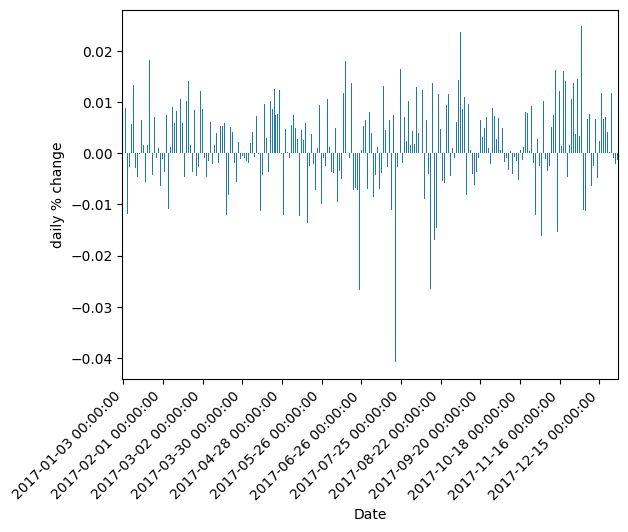

In [20]:
companydf['daily % change'].plot.bar()

ax = plt.gca()

ticks_to_use = np.arange(0,len(companydf),20)
labels = [companydf.index[i] for i in ticks_to_use]

ticks = ax.set_xticks(ticks_to_use)
labels = ax.set_xticklabels(labels,rotation=45, ha="right")

plt.xlabel('Date')
plt.ylabel('daily % change')
plt.show()

In [7]:
companydf.describe()

,Close,Adj. Close,daily % change
count,250.000000,250.000000,249.000000
mean,155.308070,154.248810,0.001490
std,12.629698,13.363731,0.008270
min,133.530000,131.178692,-0.040900
25%,147.205000,145.546204,-0.003319
50%,153.450000,152.469382,0.001172
75%,162.622500,162.622500,0.007090
max,190.360000,190.360000,0.024831


In [8]:
import yfinance as yf

sp500 = yf.download('^GSPC', start='2017-01-01', end='2017-12-31')
df500 = pd.DataFrame(sp500, columns=['Close', 'Adj Close'])
df500.head()

[*********************100%%**********************]  1 of 1 completed


,Close,Adj Close
Date,,
2017-01-03,2257.830078,2257.830078
2017-01-04,2270.750000,2270.750000
2017-01-05,2269.000000,2269.000000
2017-01-06,2276.979980,2276.979980
2017-01-09,2268.899902,2268.899902


In [9]:
return500 = sp500['Adj Close'].pct_change()
df500['daily % Change'] = return500
df500.head()

,Close,Adj Close,daily % Change
Date,,,
2017-01-03,2257.830078,2257.830078,NaN
2017-01-04,2270.750000,2270.750000,0.005722
2017-01-05,2269.000000,2269.000000,-0.000771
2017-01-06,2276.979980,2276.979980,0.003517
2017-01-09,2268.899902,2268.899902,-0.003549


In [10]:
len(df500)

251

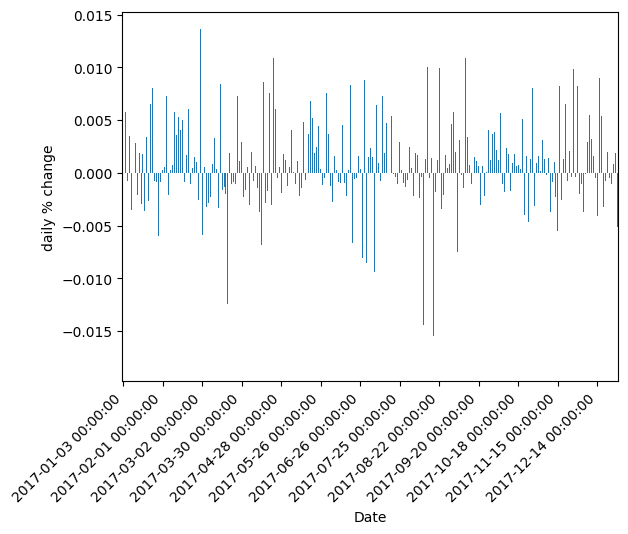

In [23]:
df500['daily % Change'].plot.bar()

ax = plt.gca()

ticks_to_use = np.arange(0,len(df500),20)
labels = [df500.index[i] for i in ticks_to_use]

ticks = ax.set_xticks(ticks_to_use)
labels = ax.set_xticklabels(labels,rotation=45, ha="right")

plt.xlabel('Date')
plt.ylabel('daily % change')
plt.show()

In [12]:
df500.describe()

,Close,Adj Close,daily % Change
count,251.000000,251.000000,250.000000
mean,2449.076379,2449.076379,0.000685
std,109.417247,109.417247,0.004191
min,2257.830078,2257.830078,-0.018178
25%,2365.584961,2365.584961,-0.001258
50%,2436.100098,2436.100098,0.000556
75%,2524.240112,2524.240112,0.002417
max,2690.159912,2690.159912,0.013674


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
combined = pd.DataFrame([returnCompany,return500],index=['Daily Company', 'Daily 500'])
combined=combined.T
combined.head()

,Daily Company,Daily 500
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.008860,0.005722
2017-01-05,-0.011808,-0.000771
2017-01-06,-0.002763,0.003517
2017-01-09,0.005841,-0.003549


In [14]:
combined_cleaned = combined.dropna()
model = LinearRegression()
combined_x = combined_cleaned[['Daily Company']]
combined_y = combined_cleaned['Daily 500']

X_train = combined_x[:-20]
X_test = combined_x[-20:]

Y_train = combined_y[:-20]
Y_test = combined_y[-20:]

model.fit(X_train,Y_train)
SP500_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

print("Mean squared error: ", round(mean_squared_error(Y_test, SP500_pred),10))
print("R^2: ", round(r2_score(Y_test, SP500_pred),5))


Intercept: 0.00045238790308253026
Coefficient: [0.17735023]
Mean squared error:  1.26266e-05
R^2:  -0.0557


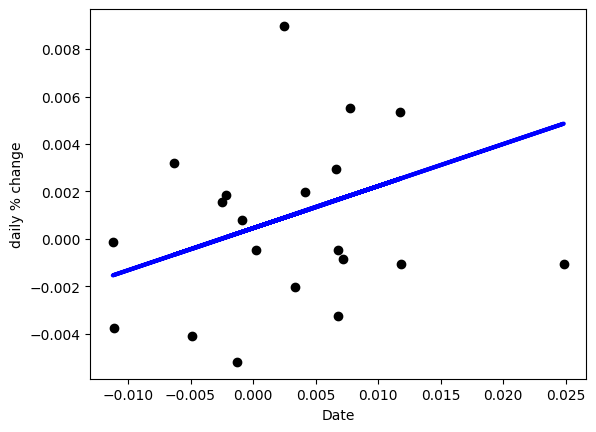

In [15]:
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, SP500_pred, color="blue", linewidth=3)

plt.xlabel('Date')
plt.ylabel('daily % change')

plt.show()

#won't work in Jupyter but works in colab

In [16]:
x=combined.corr()
y=x.loc['Daily Company']['Daily 500']
if(y>0):
  print("Positively Correlated")
elif y==0:
  print("No correlation")
else:
  print("Negatively correlated")

Positively Correlated
